In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400)
import anndata
import mplscience
import numpy as np


mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['figure.dpi'] = 250

['default', 'despine']


In [2]:
target_col = "#1099c7"
genot_col = "#317d01"

In [6]:
adata_preds_from_atac = sc.read("/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/GLI3_KO_multiome_18d_adata_src_atac_with_predictions_peakVI.h5ad")
adata_target_atac = sc.read_h5ad("/lustre/groups/ml01/workspace/ot_perturbation/data/multiome/GLI3_KO_multiome_18d_adata_tgt_test_processed_peakvi.h5ad")


/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [7]:
adata_target_atac.obsm

AxisArrays with keys: X_pca, X_peakVI, X_umap

In [8]:
adata = sc.concat(
    [adata_preds_from_atac, adata_target_atac],
    join="outer",
    label="mode",
    keys=["pred", "true"],
)
adata.obsm["X_peakVI"] = np.concatenate(
    (adata_preds_from_atac.obsm["predicted_atac_0"], adata_target_atac.obsm["X_peakVI"]), axis=0
)

In [9]:
sc.pp.neighbors(adata, use_rep="X_peakVI")
sc.tl.umap(adata)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


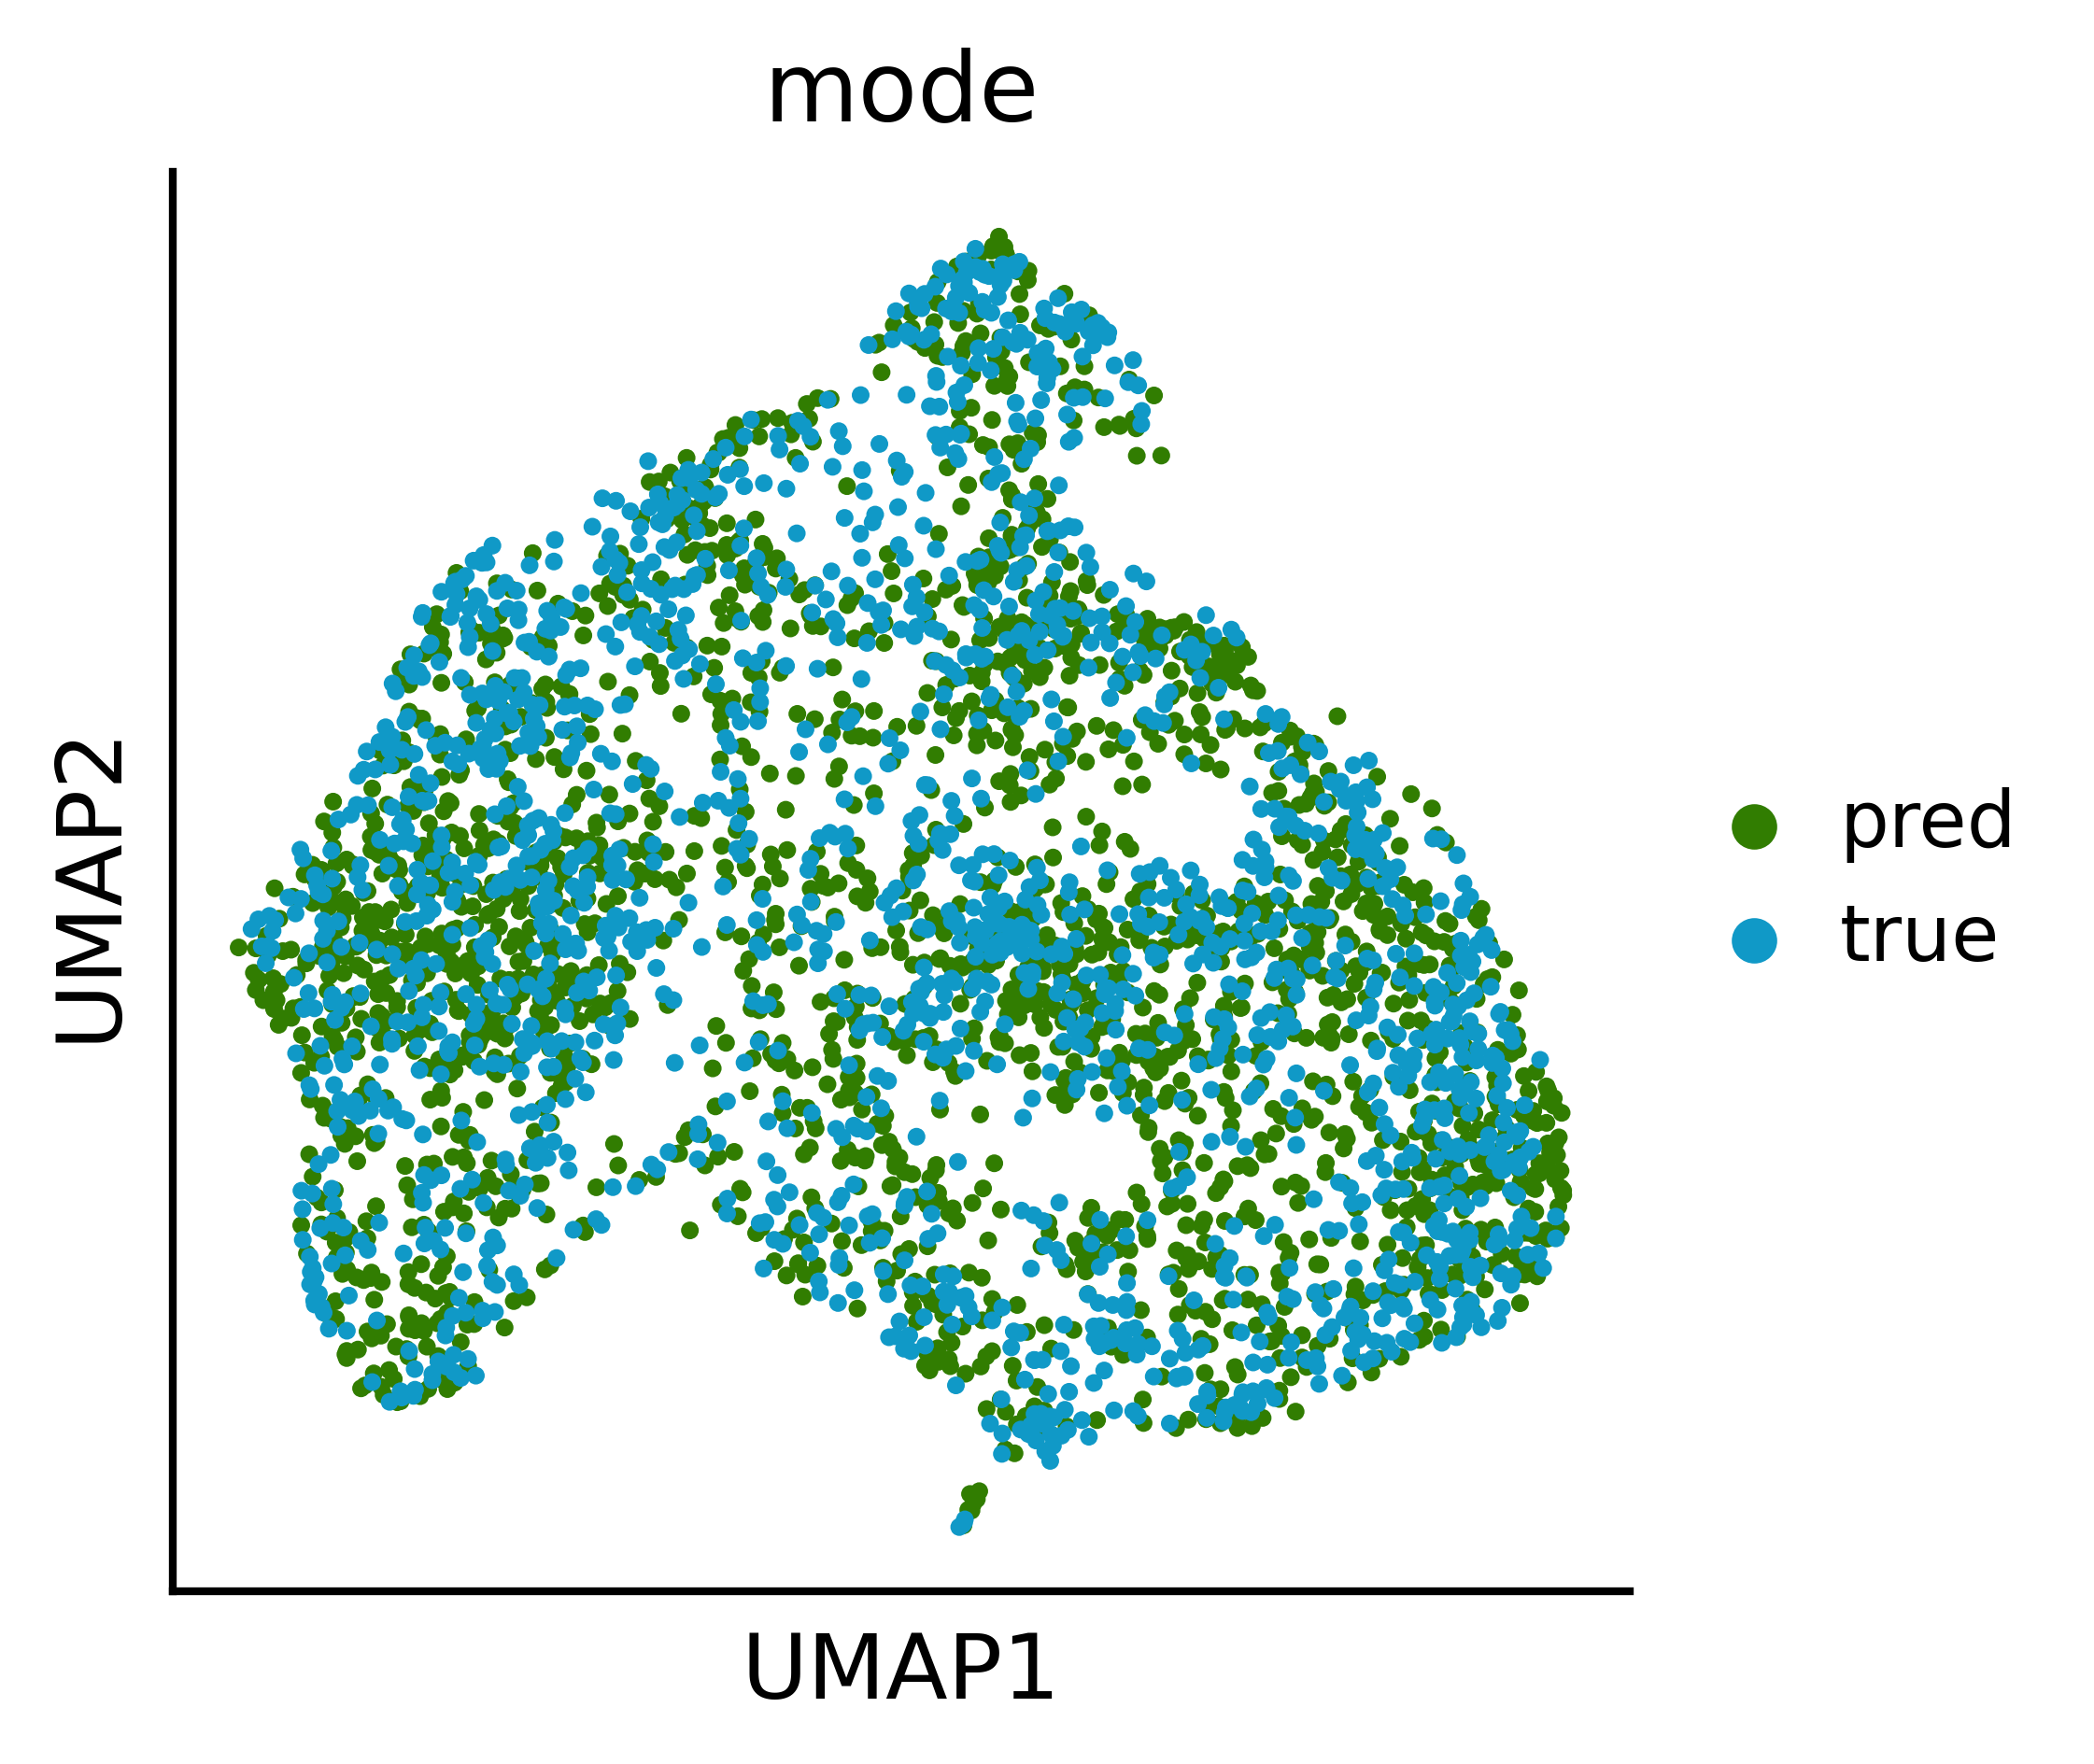

In [10]:
sc.pl.umap(adata, color="mode", palette=[genot_col, target_col])

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


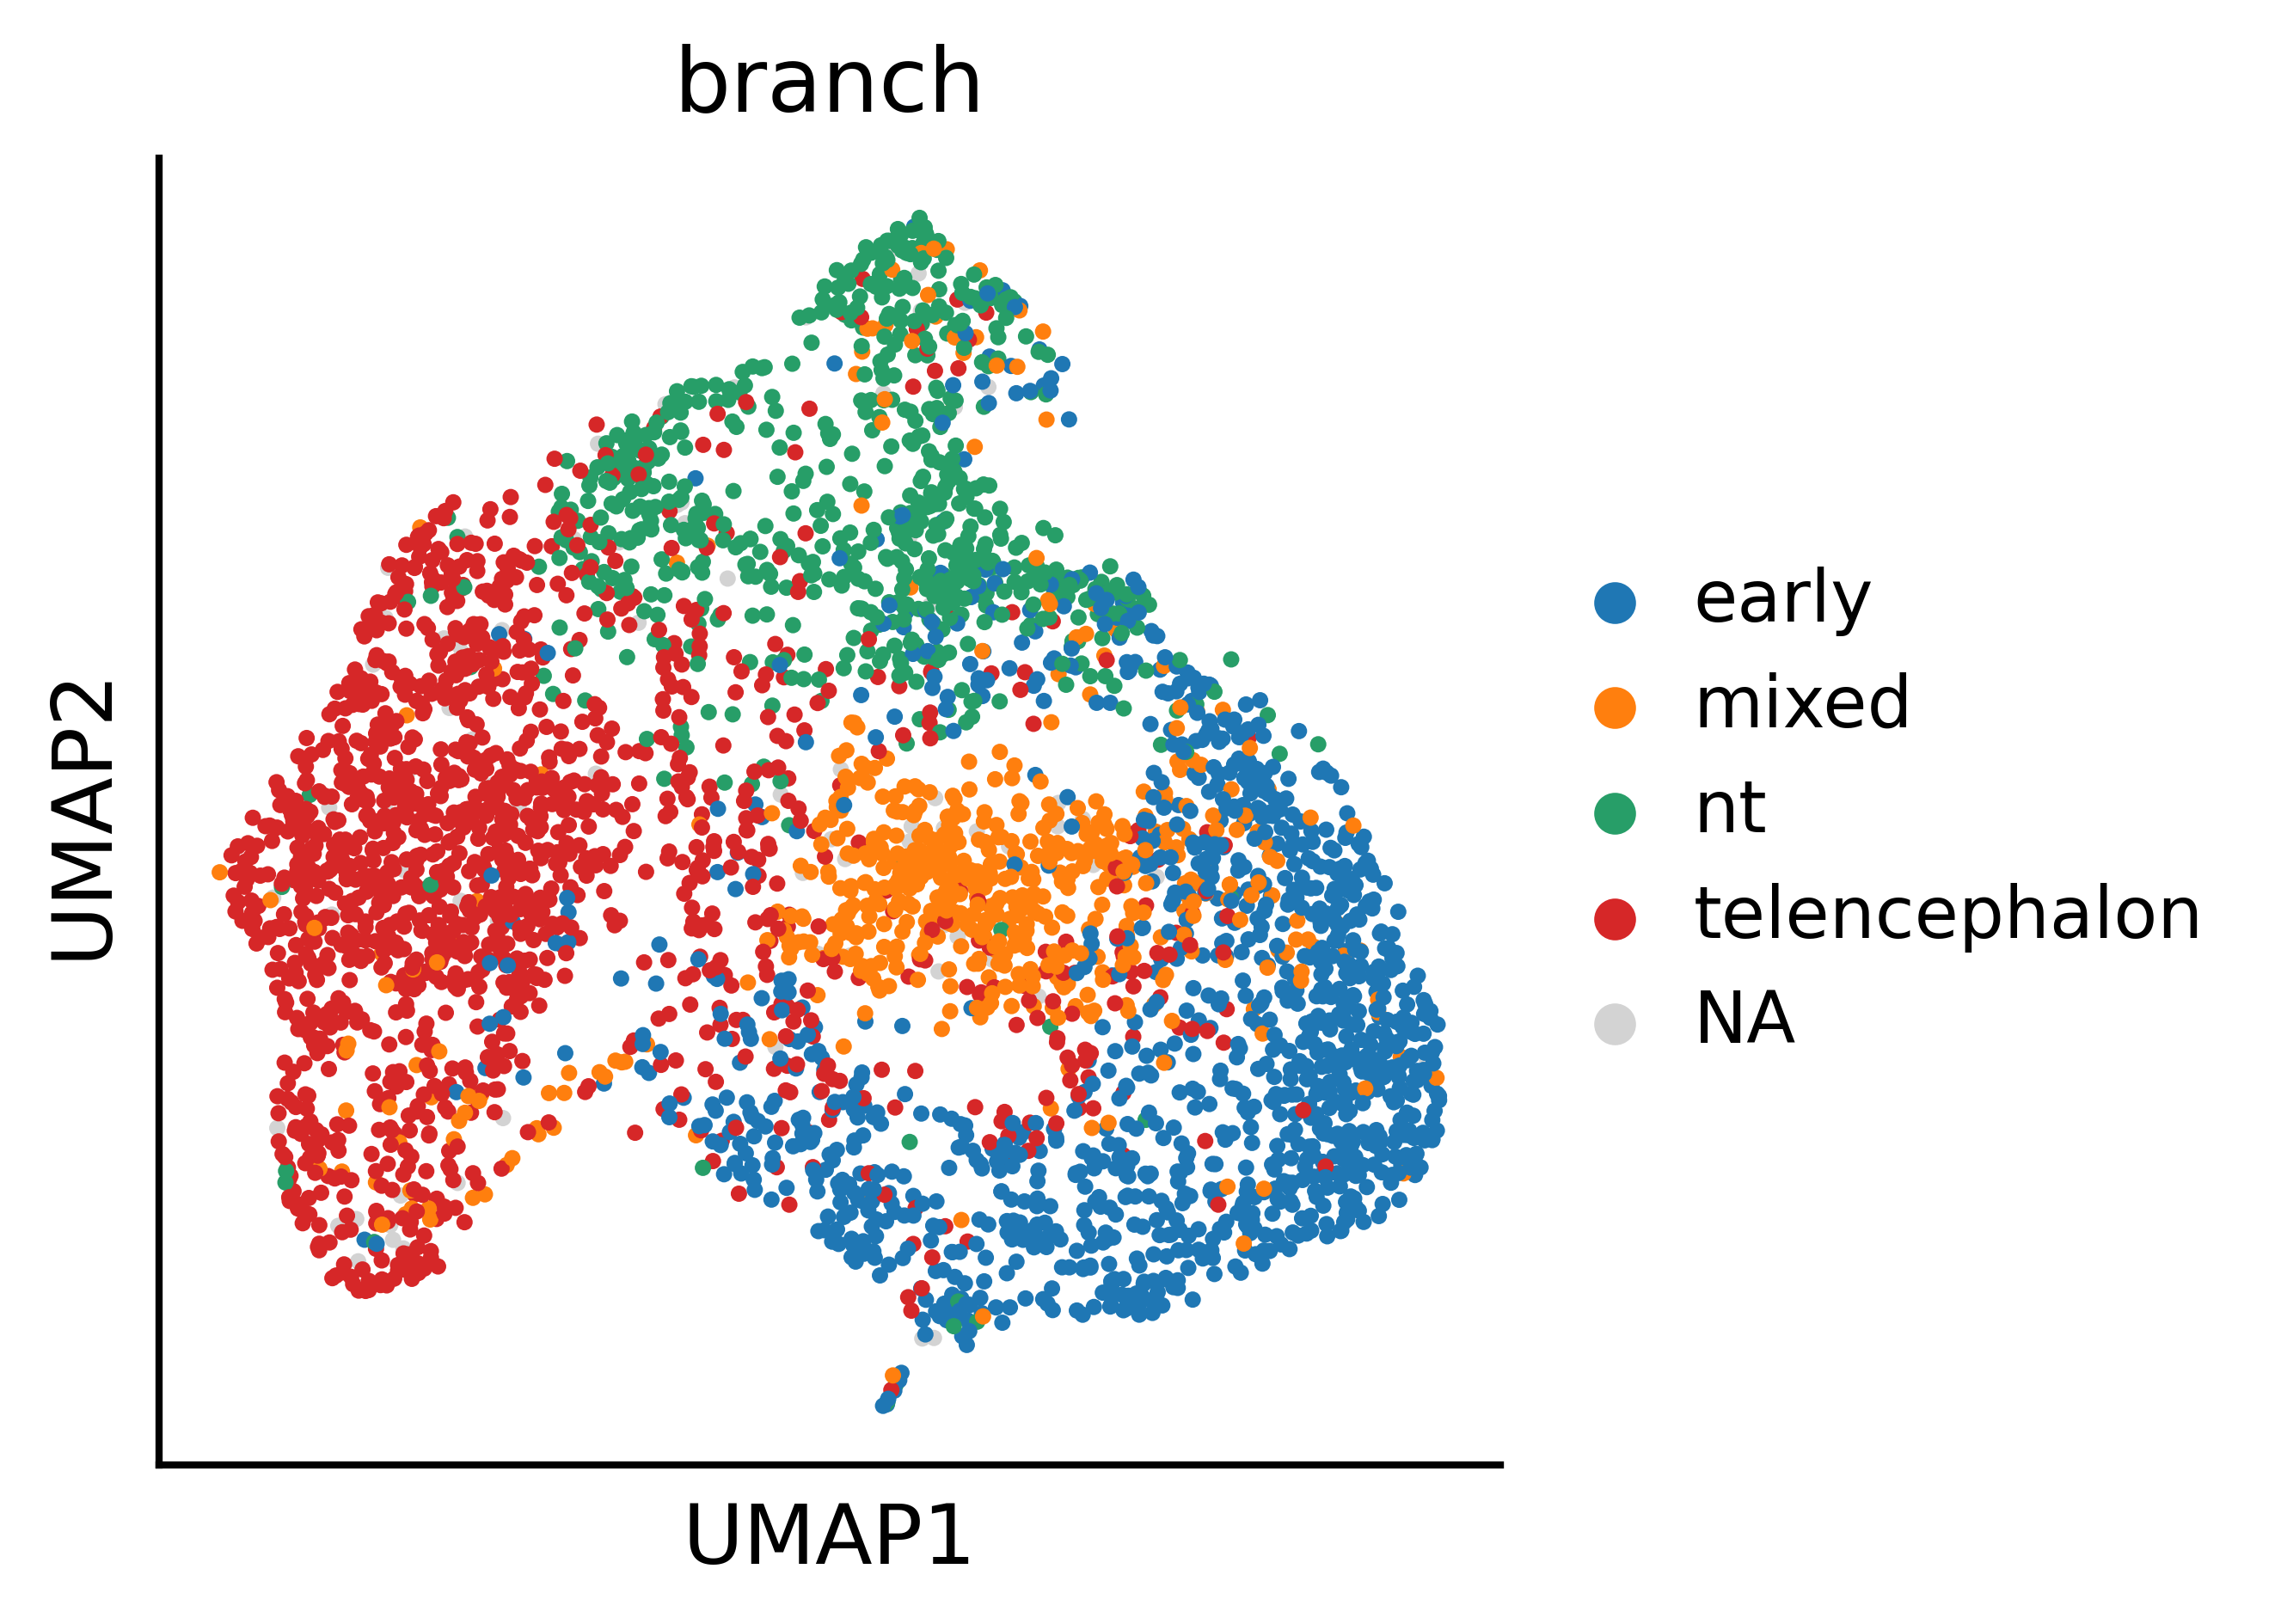

In [11]:
sc.pl.umap(adata, color="branch")